# <center> Best Practices for Image segmentation

#### This session will provide you brief introduction to some best practices to improve performance of your Image segmentation model

In [1]:
import numpy as np
import os
from skimage.io import imread
import matplotlib.pyplot as plt

In [2]:
'''
Here load_data function is called. This will load the dataset paths and 
split it into X_train, X_test, y_train, y_test '''

img_dir = '/kaggle/input/artificial-lunar-rocky-landscape-dataset/images/render'
mask_dir = '/kaggle/input/artificial-lunar-rocky-landscape-dataset/images/clean'


# let's get the list of image paths and mask paths in sorted order from the given directory respectively
images = [os.path.join(img_dir, x) for x in sorted(os.listdir(img_dir))]
masks = [os.path.join(mask_dir, x) for x in sorted(os.listdir(mask_dir))]


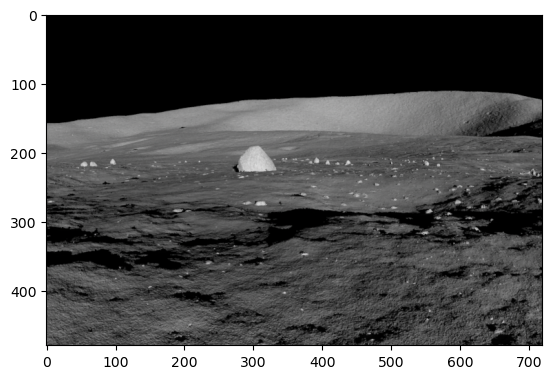

In [3]:
s_path = images[0]

sample = imread(s_path)

plt.imshow(sample)

plt.show()

## Difference of Gaussians

https://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=gaussian#difference-of-gaussians

The input array is blurred with two Gaussian kernels of differing sigmas to produce two intermediate, filtered images. The more-blurred image is then subtracted from the less-blurred image. The final output image will therefore have had high-frequency components attenuated by the smaller-sigma Gaussian, and low frequency components will have been removed due to their presence in the more-blurred intermediate.

/opt/conda/lib/python3.7/site-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


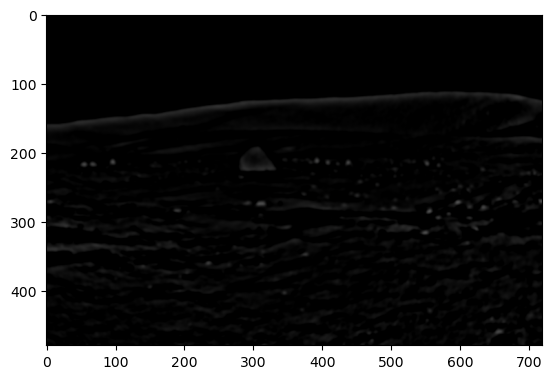

In [4]:
import skimage

# Find features between low_sigma and high_sigma in size.
pre = skimage.filters.difference_of_gaussians(sample, low_sigma = 2, high_sigma = 8)

plt.imshow(pre)
plt.show()

## Ensure that all the images have the same orientation

https://albumentations.ai/

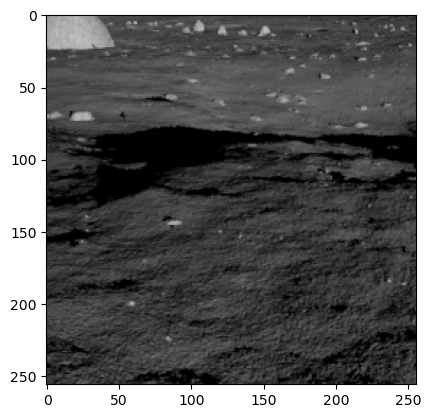

In [5]:
import albumentations as A
import cv2

# Declare an augmentation pipeline
transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

# Read an image with OpenCV and convert it to the RGB colorspace
image = cv2.imread(s_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Augment an image
transformed = transform(image=image)
transformed_image = transformed["image"]

plt.imshow(transformed_image)

## Why Albumentations?

https://github.com/albumentations-team/albumentations

* Albumentations supports all common computer vision tasks such as classification, semantic segmentation, instance segmentation, object detection, and pose estimation.
* The library provides a simple unified API to work with all data types: images (RBG-images, grayscale images, multispectral images), segmentation masks, bounding boxes, and keypoints.
*     The library contains more than 70 different augmentations to generate new training samples from the existing data.
*     Albumentations is fast. They benchmark each new release to ensure that augmentations provide maximum speed.
*     It works with popular deep learning frameworks such as PyTorch and TensorFlow. By the way, Albumentations is a part of the PyTorch ecosystem.
*     Written by experts. The authors have experience both working on production computer vision systems and participating in competitive machine learning. Many core team members are Kaggle Masters and Grandmasters.
*     The library is widely used in industry, deep learning research, machine learning competitions, and open source projects.


## Contrast Streching and Histogram Equalization

/opt/conda/lib/python3.7/site-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


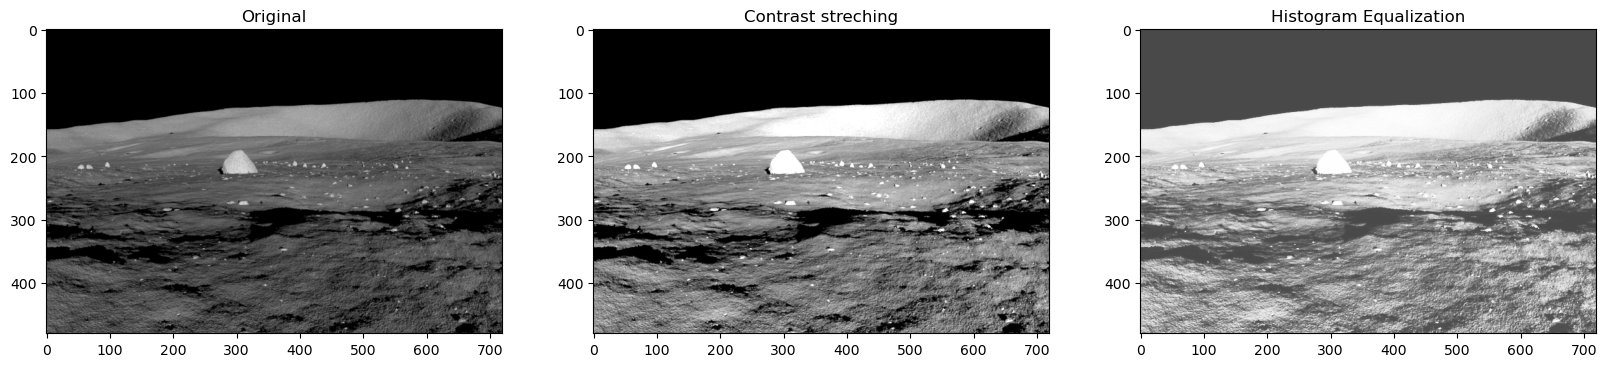

In [6]:
# Contrast stretching - improve the contrast in an image by 
# `stretching' the range of intensity values it contains to span a desired range of values
p2, p98 = np.percentile(sample, (2, 98))
img_rescale = skimage.exposure.rescale_intensity(sample, in_range=(p2, p98))

# Equalization - spreads out the most frequent intensity values
img_eq = skimage.exposure.equalize_hist(sample)

# plotting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 8))

ax1.set_title("Original")
ax1.imshow(sample)

ax2.set_title("Contrast streching")
ax2.imshow(img_rescale)

ax3.set_title("Histogram Equalization")
ax3.imshow(img_eq)

plt.show()

While histogram equalization has the advantage that it requires no parameters, it sometimes yields unnatural looking images.

In Contrast stretching, the image is rescaled to include all intensities that fall within the 2nd and 98th percentiles.

## Pseudo labeling (Semi Supervised learning)

https://towardsdatascience.com/pseudo-labeling-to-deal-with-small-datasets-what-why-how-fd6f903213af

It will be useful in those cases when you have labels for a very small subset of data but not for the other. In that case, you can generate model training pipeline to use outputs from model unlabeled data to act as labels and train with unlabeled data also.




![](https://miro.medium.com/max/1118/1*Yk_mGPVIJgkIhf0gWo7PTA.png)

## Ensemble with different SOTA models. 

https://www.kaggle.com/c/inclusive-images-challenge/discussion/72450

https://github.com/IVPLatNU/DeepCovidXR

![](https://miro.medium.com/max/1400/1*MxD8Kn_Rn9p_Au4MOGgsmg.png)


## Different metrics to use:-

* https://www.jeremyjordan.me/evaluating-image-segmentation-models/
* https://towardsdatascience.com/metrics-to-evaluate-your-semantic-segmentation-model-6bcb99639aa2
* https://www.kaggle.com/code/yassinealouini/all-the-segmentation-metrics/notebook

## Some more references for future:-

* https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0255397
* https://neptune.ai/blog/image-segmentation
* https://www.v7labs.com/blog/panoptic-segmentation-guide
* https://www.v7labs.com/blog/image-annotation-guide
* And always: https://spartificial.com/resources
